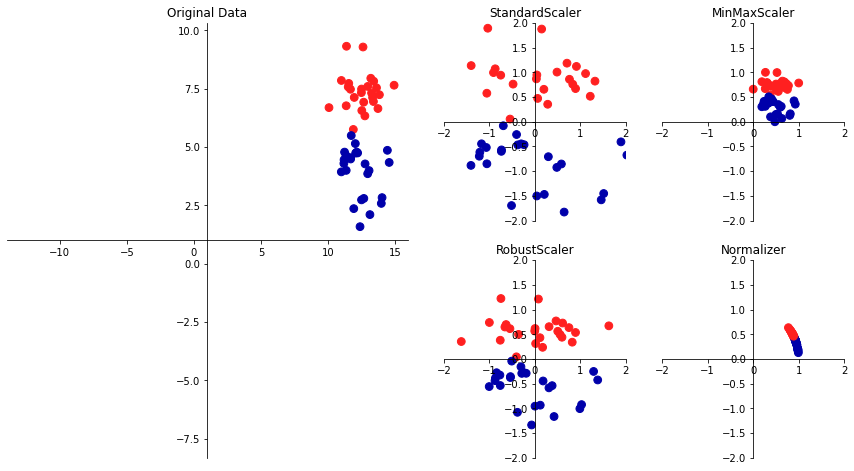

In [6]:
import mglearn


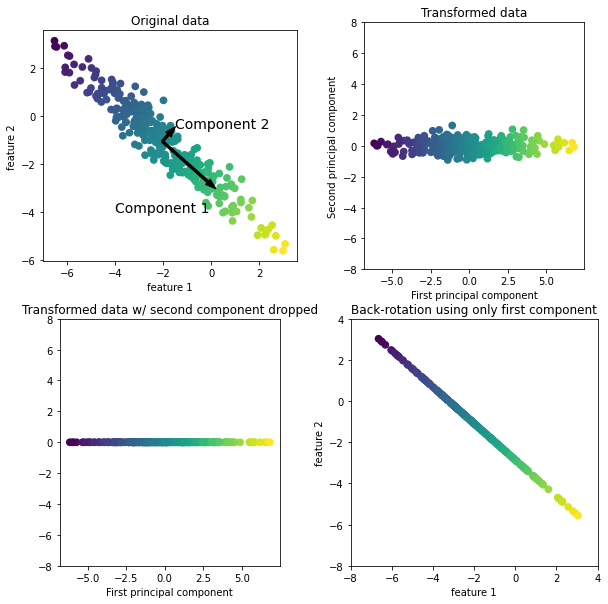

In [9]:
mglearn.plots.plot_pca_illustration()

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
# 变换数据
X_train_scaled = scaler.transform(X_train)
# 在缩放之前和之后分别打印数据集属性
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
 X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
 X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [16]:
# 对测试数据进行变换
X_test_scaled = scaler.transform(X_test)
# 在缩放之后打印测试数据的属性
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.svm import SVC

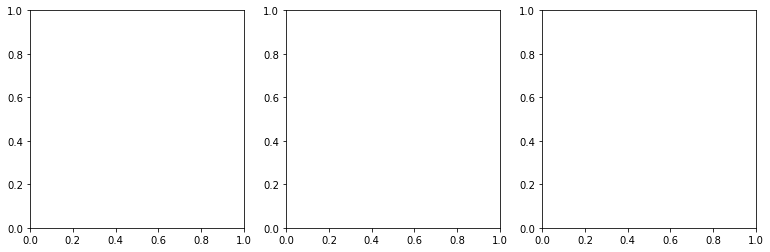

In [22]:
from pylab import *
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

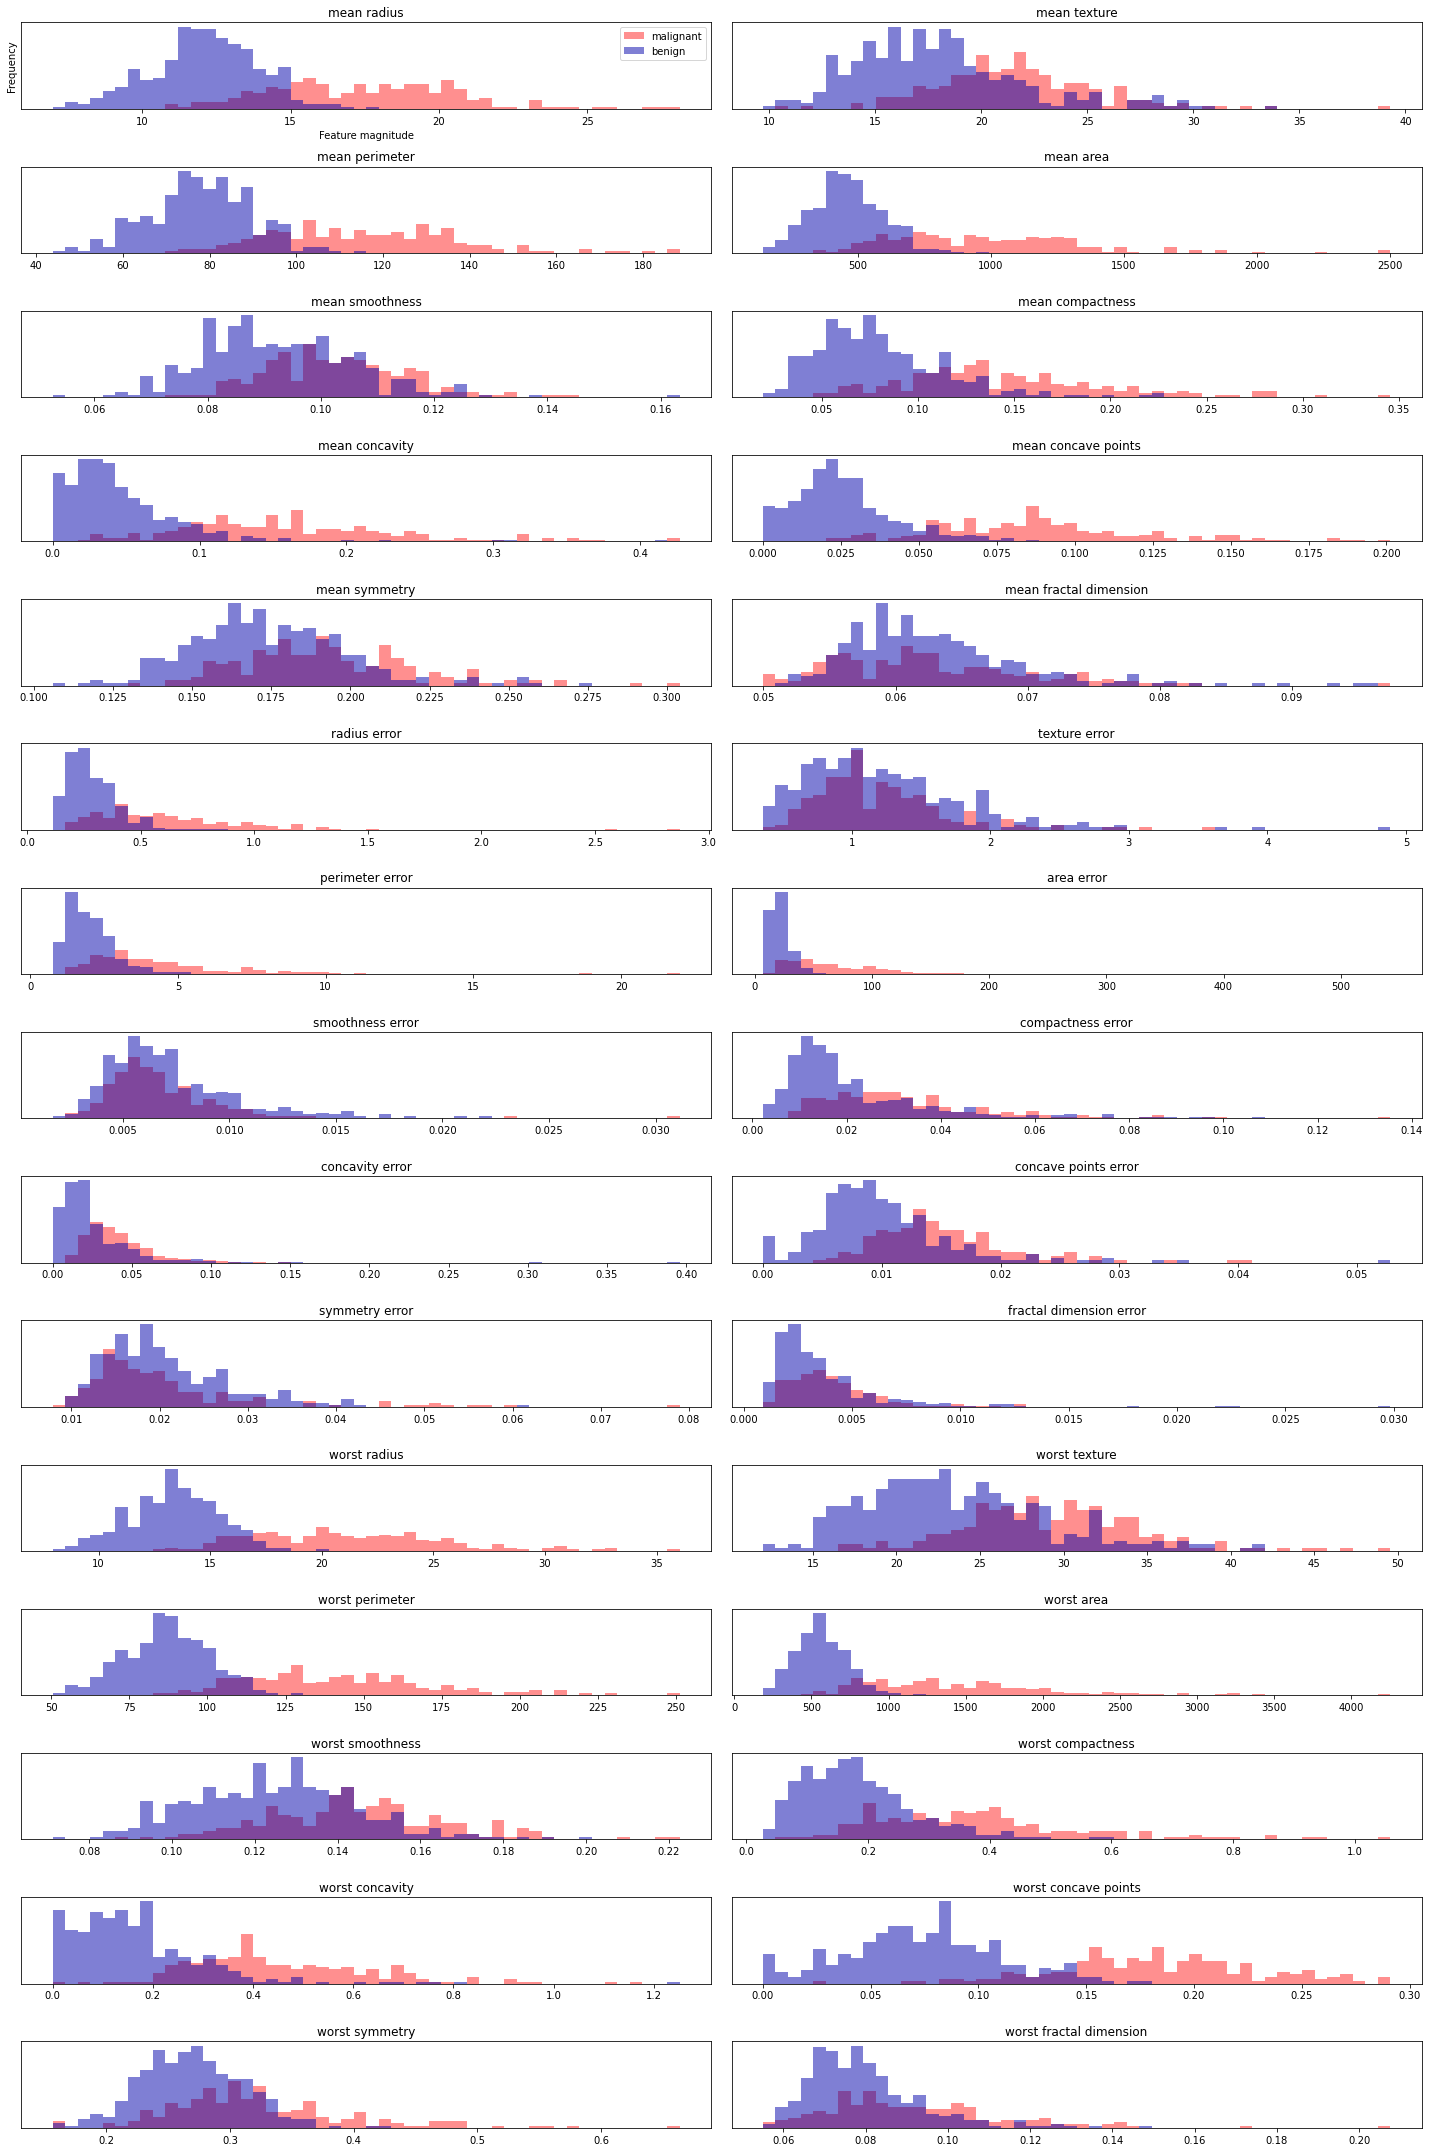

In [45]:
fig, axes = plt.subplots(15, 2, figsize=(20, 30))#创建图表15行，两列，尺寸高10，宽20
malignant = cancer.data[cancer.target == 0]#恶性肿瘤
benign = cancer.data[cancer.target == 1]#良性肿瘤

ax = axes.ravel()

for i in range(30):#对三十个数据进行循环作图
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)#恶性肿瘤数据插入
 ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)#良性肿瘤数据插入
 ax[i].set_title(cancer.feature_names[i])#设置表头名称为癌症特征的名字
 ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")#设置x轴的标签名
ax[0].set_ylabel("Frequency")#设置y轴的标签名
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()#紧密布局

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)# 保留数据的前两个主成分

pca.fit(X_scaled)# 对乳腺癌数据拟合PCA模型

X_pca = pca.transform(X_scaled)# 将数据变换到前两个主成分的方向上

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

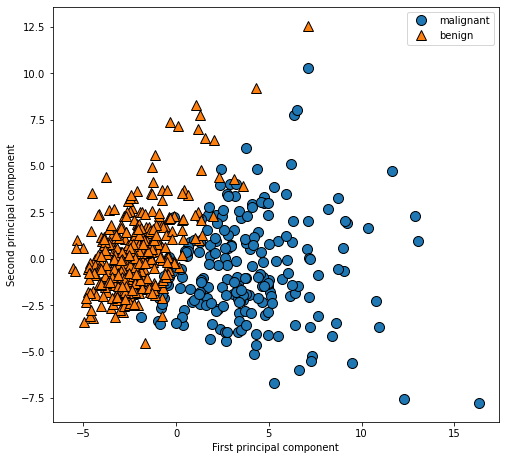

In [51]:
# 对第一个和第二个主成分作图，按类别着色
plt.figure(figsize=(8, 8))#作图外形大小8×8
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)#散点图 malignant == 0 ；benign == 1
plt.legend(cancer.target_names, loc="best")#图例
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")#x轴
plt.ylabel("Second principal component")#y轴

In [52]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [53]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

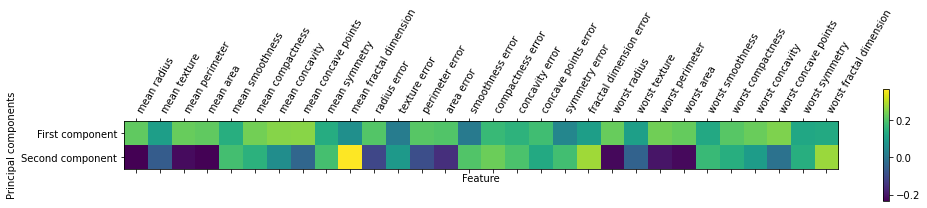

In [69]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()#颜色比例尺
plt.xticks(range(len(cancer.feature_names)),
 cancer.feature_names, rotation=60, ha='left')#特征名向左旋转60°
plt.xlabel("Feature")#x轴为特征
plt.ylabel("Principal components")#y轴为主要成份：第一主要成分，第二主要成分